<a href="https://colab.research.google.com/github/MariamKhan98/mariamkhan98/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import datasets


In [20]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [21]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
#predict the price of the house based on the attributes available.
housing_df.describe()
housing_df.isna().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
HousePrice,0


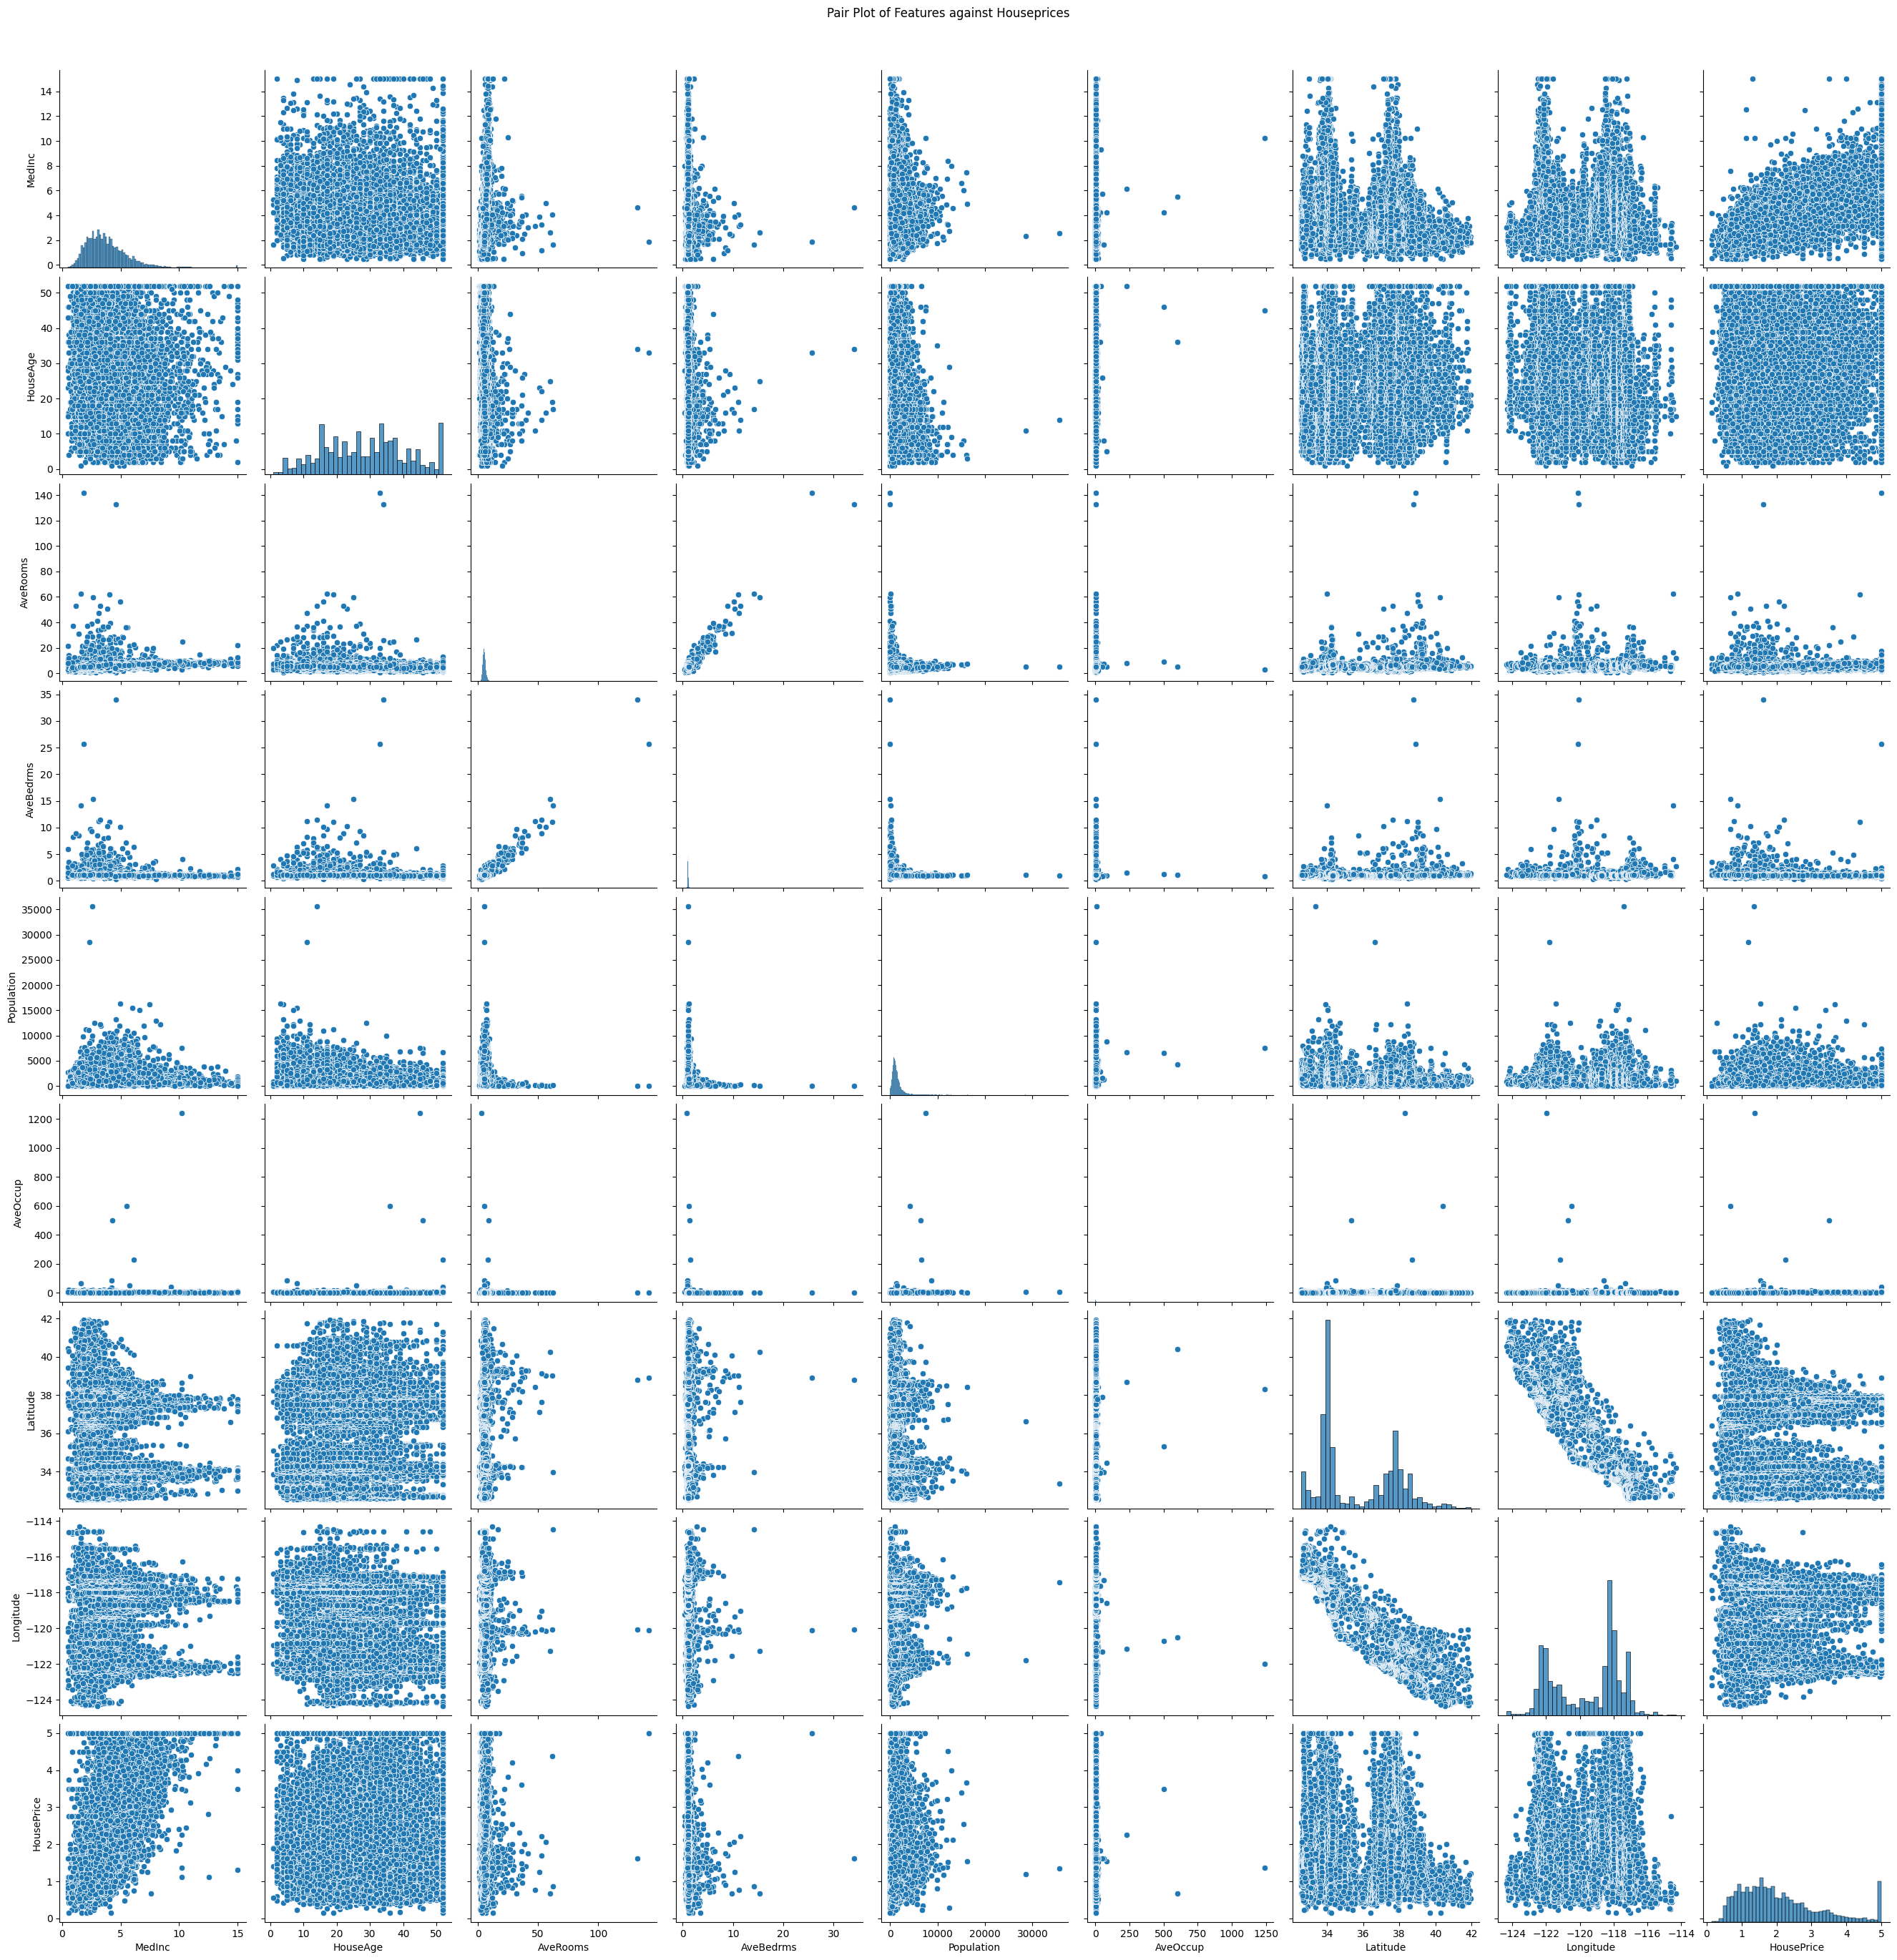

In [23]:
sns.pairplot(housing_df, height=3, palette="viridis")
plt.suptitle('Pair Plot of Features against Houseprices', y=1.02)
plt.show()

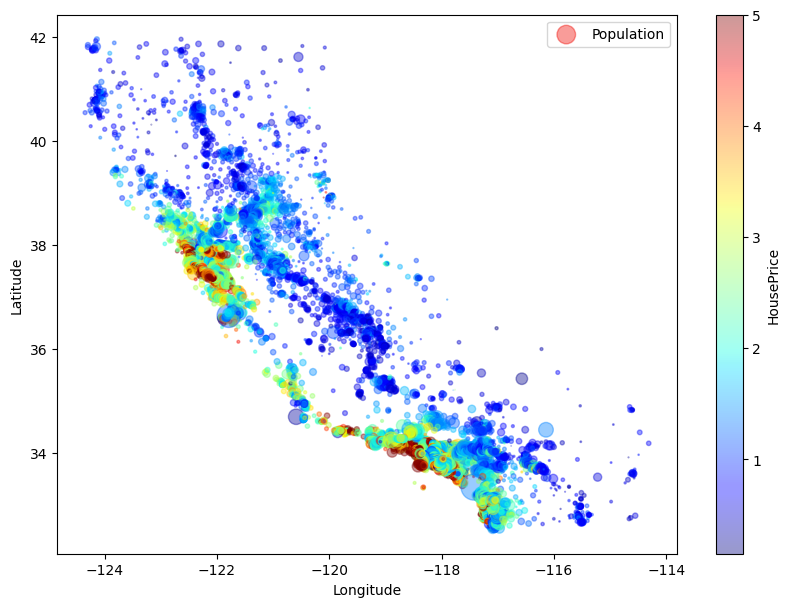

In [24]:
#how house prices and ppopulation density vary across diff locations
housing_df.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
    alpha=0.4,
    s=housing_df['Population']/100,
    label='Population',
    figsize=(10,7),
    c='HousePrice',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
)
plt.show()


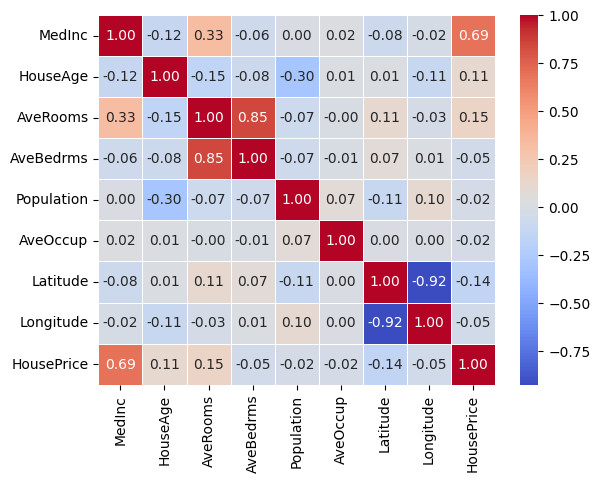

In [25]:
corr = housing_df.corr()
plt.figsize=(10,8)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.show()


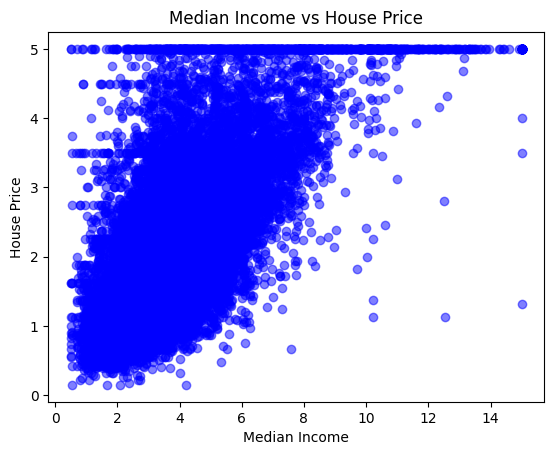

In [26]:
#plot the scatter plot to understand the relationship between median income and houseprice.
medinc = housing_df["MedInc"]
houseprice = housing_df["HousePrice"]
plt.scatter(medinc, houseprice, alpha=0.5, color='blue')
plt.title("Median Income vs House Price"  )
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.show()

In [27]:
#calculate the variance inflation factor. VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif = housing_df.drop('HousePrice', axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors='coerce')

vif_data =  pd.DataFrame()
vif_data["Feature"] = housing_df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(housing_df_vif.values, i) for i in range(len(housing_df_vif.columns))]

print(vif_data)



      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [28]:
#the output reveals that latitude and longitude have very high values revealing multicoliniary issues. Next lets drop these columns
housing_df = housing_df.drop(['Latitude', 'Longitude'], axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [29]:

#convert to numeric
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'], errors='coerce')

X = sm.add_constant(housing_df.drop('HousePrice', axis=1))
y = housing_df['HousePrice']

model = sm.OLS(y, X).fit()


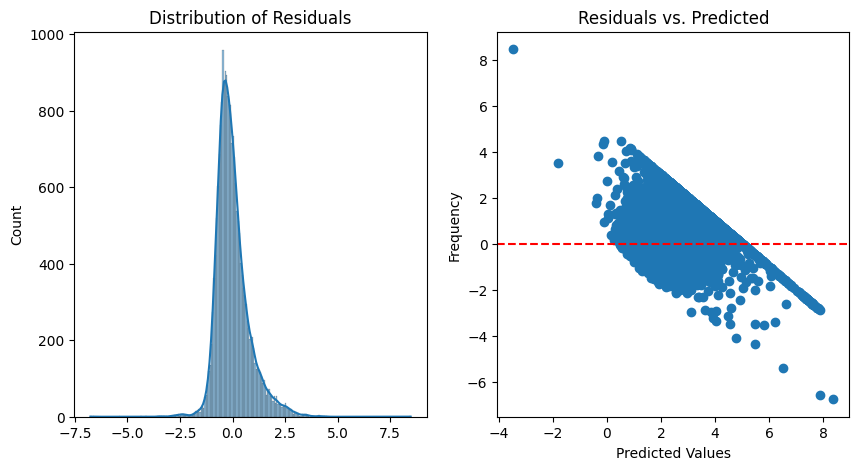

Model coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64

Model summary:
 <bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7be1f68fad10>>


In [30]:
residuals = model.resid

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()

print("Model coefficients:\n", model.params)
print("\nModel summary:\n", model.summary)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.6129156196698703
R-squared: 0.5396977345638283


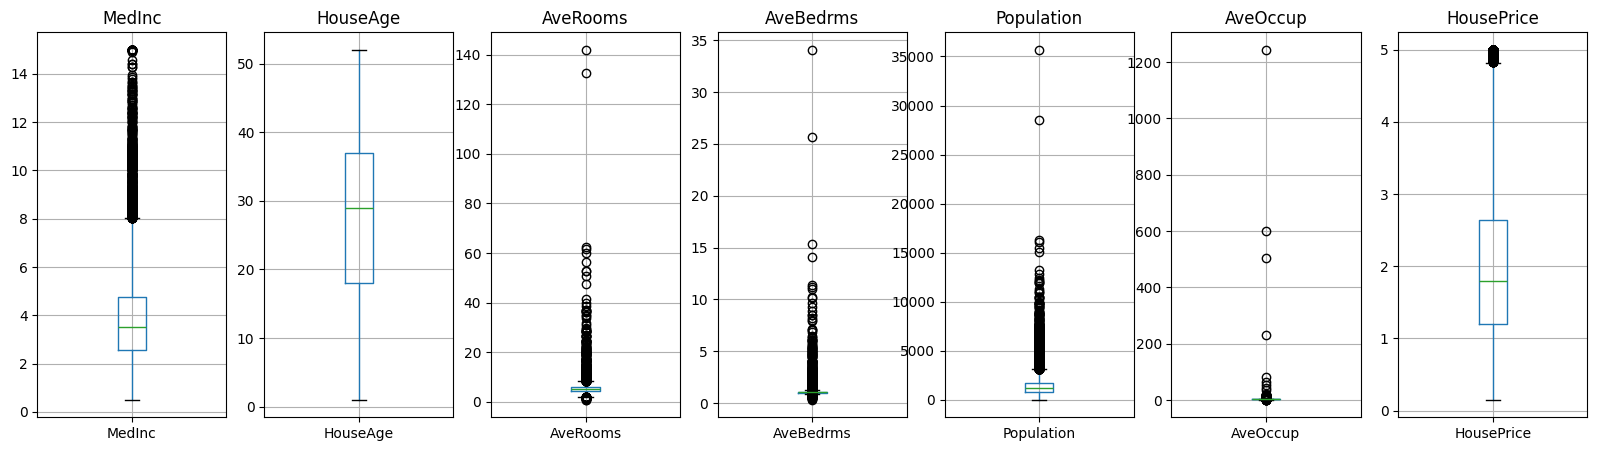

In [32]:
import matplotlib.pyplot as plt
def plot_boxplots(df):
  fig, axes = plt.subplots(1, len(df.columns), figsize=(20, 5))

  for i, column_name in enumerate(df.columns):
    df.boxplot(column=column_name, ax=axes[i])
    axes[i].set_title(column_name)

  plt.show()

plot_boxplots(housing_df)

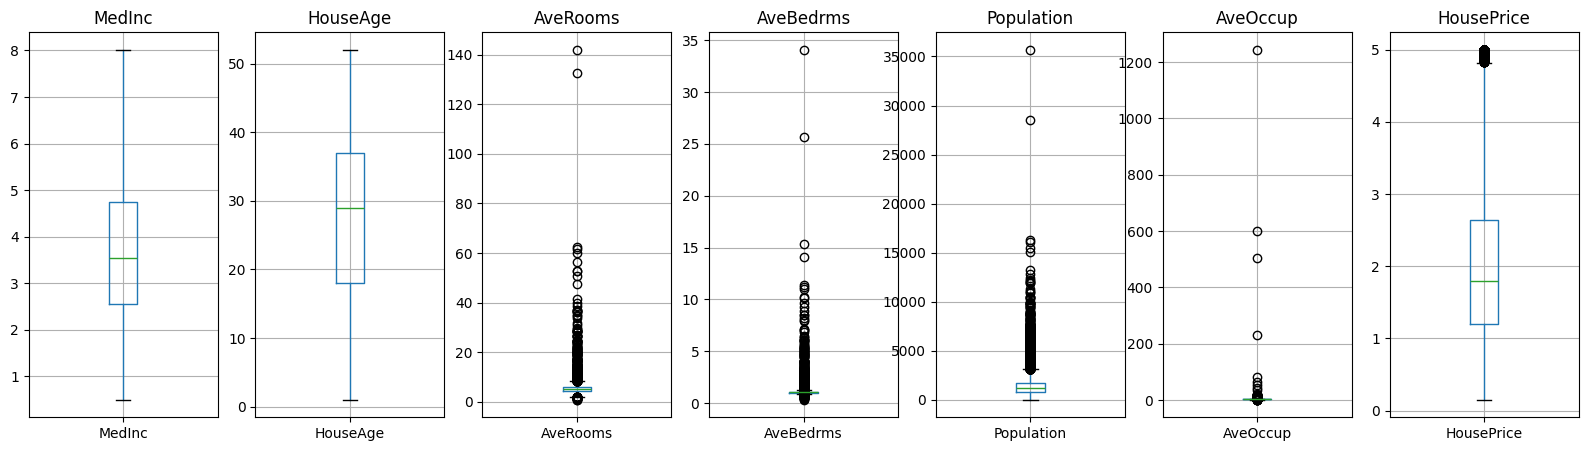

In [52]:
#remove _ outliers and replaces bounds
def remove_outliers(df):
  df_no_outliers = df.copy()

  for column_name in df.columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound
                                                                    else upper_bound if x > upper_bound else x)
    return df_no_outliers

housing_df_new = remove_outliers(housing_df)
plot_boxplots(housing_df_new)



In [54]:
#lets fit the regression model to evaluate the

cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df_new[cols_to_convert] = housing_df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df_new['HousePrice'] = pd.to_numeric(housing_df_new['HousePrice'], errors='coerce')

X = sm.add_constant(housing_df_new.drop('HousePrice', axis=1))
y = housing_df_new['HousePrice']

model = sm.OLS(y, X).fit()


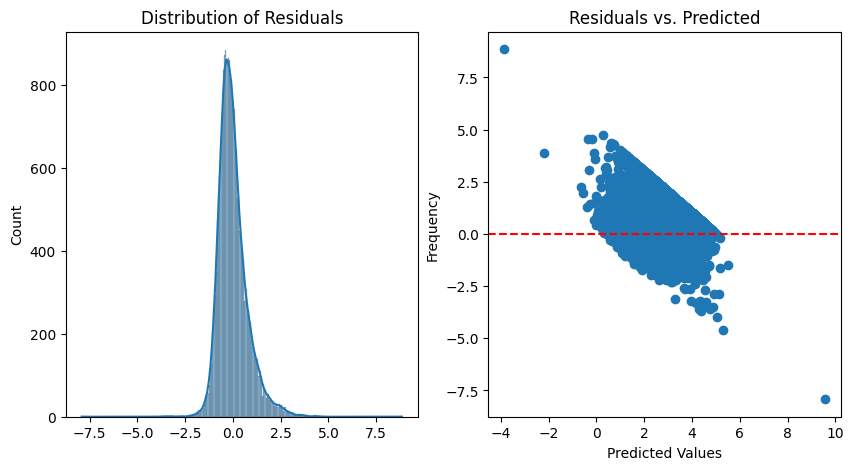

Model coefficients:
 const        -0.822066
MedInc        0.636220
HouseAge      0.018196
AveRooms     -0.235729
AveBedrms     1.117237
Population    0.000014
AveOccup     -0.004408
dtype: float64

Model summary:
 <bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7be1f544d790>>


In [56]:
residuals = model.resid

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()

print("Model coefficients:\n", model.params)
print("\nModel summary:\n", model.summary)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5951374880328387
R-squared: 0.5530491878554834
